# GoBike Data Exploration
## by Chinemelum Nwaeze

## Introduction
> The dataset used here shows the Ford's Gobike bike sharing services for the year 2019, containing data of over 180,000 cyclers

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
Ford_data = pd.read_csv('201902-fordgobike-tripdata.csv')
Ford_data.info()
Ford_data
# From the results see below, there calls the need for data wrangling activity to be carried out on this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


## Data Wrangling

In [3]:
Ford_data1= Ford_data.copy()

In [4]:
#Lets start by looking at the age across the dataset, since the year data is collected is 2019['age'] = 2019, I would subtract this from the birth year of each member to get their ages.
Ford_data1['age'] = 2019 - Ford_data1['member_birth_year']
Ford_data1['age']

0         35.0
1          NaN
2         47.0
3         30.0
4         45.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: age, Length: 183412, dtype: float64

In [5]:
#Giving the missing age values, I would use the mean_age to fill it up and change the datatype to integer as ages cannot be in floats
mean_age = Ford_data1['age'].mean()
Ford_data1['age'] = Ford_data1['age'].fillna(mean_age)
Ford_data1['age'] = Ford_data1['age'].astype('int')

In [6]:
#I would prefer to use minutes for this analysis instead of seconds thus the division of the duration_sec by 60
Ford_data1['duration_mins'] = Ford_data1.duration_sec / 60

In [7]:
Ford_data1['duration_mins'] = round(Ford_data1['duration_mins'],0).astype(int)

For my analysis, there are columns that are not necessary to be left in the dataset, these I would have to delete

> The start and the end time column mirrors the duration_sec, thus no longer necessary for the analysis, I would not also be working with 'bike_id','start_station_id','end_station_id','start_station_latitude','start_station_longitude','end_station_latitude',
'end_station_longitude'.

In [8]:
Ford_data1.drop(['bike_id','member_birth_year','start_time','end_time','start_station_id','end_station_id',
          'start_station_latitude','start_station_longitude','end_station_latitude',
           'end_station_longitude', 'duration_sec'], axis = 1, inplace = True)
Ford_data1.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,duration_mins
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,35,870
1,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,No,34,709
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,47,1031
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,30,608
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,45,26


In [9]:
Ford_data1.shape
print(f"the dataset has {Ford_data1.shape[0]} rows and {Ford_data1.shape[1]} columns")
print(Ford_data1.dtypes)

the dataset has 183412 rows and 7 columns
start_station_name         object
end_station_name           object
user_type                  object
member_gender              object
bike_share_for_all_trip    object
age                         int32
duration_mins               int32
dtype: object


### What is the structure of your dataset?

> the dataset has 183412 rows and 7 columns(start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,duration_mins) that I have chosen to work with. 5 objects and two numerical columns

### What is/are the main feature(s) of interest in your dataset?

> my main features of interest are the duration_mins,age and member_gender columns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe there should be more of the younger generation involved in this program judging how streneous bike riding is and there should be more male than female riding for longer duration. 
> Also I believe the older generation to ride for a lesser distance than the younger generation.

## Univariate Exploration

###  I would like to start by examining  the age, duration spent and gender distribution of the cyclers

In [10]:
Ford_data1.age.describe()

count    183412.000000
mean         34.184841
std           9.886200
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

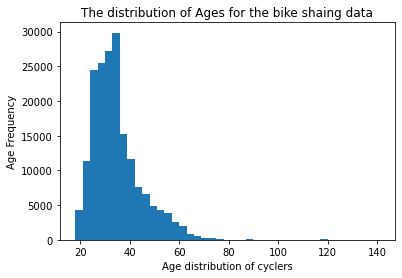

In [11]:
bins = np.arange(18, 141 + 3, 3)
plt.hist(data = Ford_data1,x = 'age', bins = bins);

def plot_func(plt, xlabel, ylabel, title):
    """""Create a function that helps to add title and label to the visual"""""
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
plot_func(plt, 'Age distribution of cyclers', 'Age Frequency', 'The distribution of Ages for the bike shaing data')

The distribution seem to contain outliers, I would take a closer look at the distribution before working on the outliers

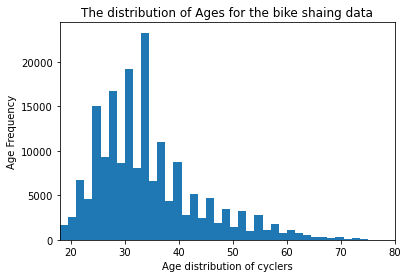

In [12]:
bins = np.arange(18, 141 + 1.5, 1.5)
plt.hist(data = Ford_data1,x = 'age', bins = bins);

plot_func(plt, 'Age distribution of cyclers', 'Age Frequency', 'The distribution of Ages for the bike shaing data')
plt.xlim((18,80));

Generally, the age distribution is unimodal and skewed to the right, there are more cyclers in their late 20s' to late 30s'

In [13]:
Ford_data1.duration_mins.describe()

count    183412.000000
mean         12.101340
std          29.908512
min           1.000000
25%           5.000000
50%           9.000000
75%          13.000000
max        1424.000000
Name: duration_mins, dtype: float64

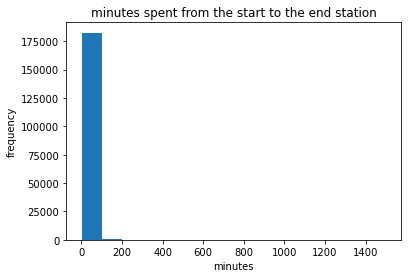

In [14]:
bins = np.arange(1.0, 1424 + 100, 100)
plt.hist(data = Ford_data1, x = 'duration_mins', bins = bins);
plot_func(plt, 'minutes','frequency','minutes spent from the start to the end station')

The duration_mins is also affected by outliers, I would work in the outliers before continuing with my analysis

In [15]:
min_age = Ford_data1['age'].describe()[4]
max_age = Ford_data1['age'].describe()[6]

IQR = max_age - min_age
low_range = min_age - ( 1.5 * IQR )
upper_range = max_age + (1.5 * IQR )

print(IQR)
print(low_range)
print(upper_range)

11.0
10.5
54.5


In [16]:
min_mins = Ford_data1['duration_mins'].describe()[4]
max_mins = Ford_data1['duration_mins'].describe()[6]

IQR = max_mins - min_mins
low_range = min_mins - ( 1.5 * IQR )
upper_range = max_mins + (1.5 * IQR )

print(IQR)
print(low_range)
print(upper_range)

8.0
-7.0
25.0


In [17]:
# For better visualization and clarity, i would drop the outliers
Ford_data = Ford_data1.drop(Ford_data1[(Ford_data1['age'] < 10.5) | (Ford_data1['age'] > 54.5) | (Ford_data1['duration_mins'] < -7) | (Ford_data1['duration_mins'] > 25)].index)
Ford_data

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,duration_mins
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,36,19
9,Post St at Kearny St,Mission Playground,Subscriber,Male,No,27,17
10,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,Female,Yes,23,8
11,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,Subscriber,Male,No,26,8
12,Valencia St at 21st St,Broadway at Kearny,Customer,Male,No,29,20
...,...,...,...,...,...,...,...
183407,Beale St at Harrison St,Union Square (Powell St at Post St),Subscriber,Male,No,23,8
183408,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,Subscriber,Male,No,35,5
183409,The Alameda at Bush St,Morrison Ave at Julian St,Subscriber,Male,Yes,29,2
183410,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,Subscriber,Male,No,31,2


In [18]:
Ford_data.to_csv('The Ford GoBike Data Analysis',index = 0)

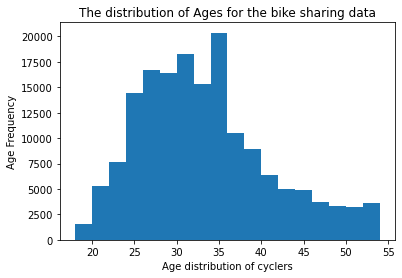

In [19]:
bins = np.arange(18, 54 + 2, 2)
plt.hist(data = Ford_data,x = 'age', bins = bins);
plot_func(plt,'Age distribution of cyclers','Age Frequency','The distribution of Ages for the bike sharing data')

There is not much difference in comparison with the first plot of age distribution, most cyclers here still fall within late 20s' and late 30s', the chart above still maintais a unimodal and right skewed distribution.

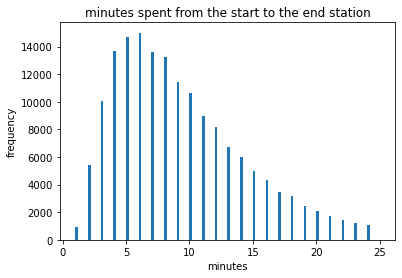

In [20]:
bins = np.arange(1.0, 25 + 0.2, 0.2)
plt.hist(data = Ford_data, x = 'duration_mins', bins = bins);
plot_func(plt,'minutes','frequency','minutes spent from the start to the end station')

The duration_mins is also unimodal and slightly right skewed with the time spent cycling increaing at a decreasing rate

Given as the gender distribution involves comparison, the best plot to use here is the piechart as I am considering proportion of a whole

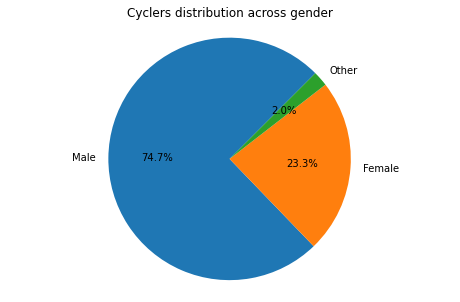

In [21]:
plt.figure(figsize = [8,5])
gender_dist = Ford_data['member_gender'].value_counts()
plt.pie(gender_dist, labels = gender_dist.index, startangle = 45,autopct='%1.1f%%');
plt.axis('equal');
plt.title('Cyclers distribution across gender');

The male gender is domineering in the dataset falling in line with my initial expectations about the dataset

Looking at other variables in the dataset, I would perform some analysis to understand their relationship with my variables of interest

### Which stations are mostly patronized by the cyclers?

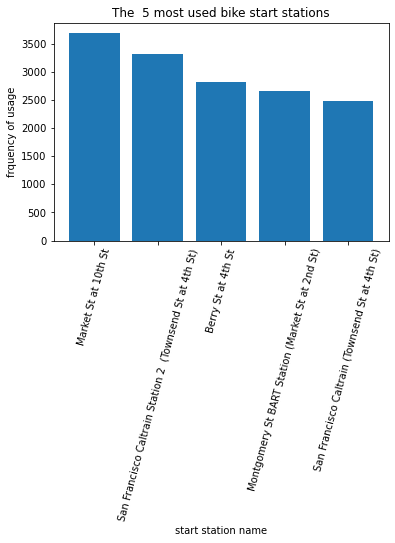

In [22]:
#To avoid overcrowding the chart, I chose to examin just the first 5 start and end stations
Top_5 = Ford_data.start_station_name.value_counts()[:5]
plt.bar(x = Top_5.index, height = Top_5.values);
plot_func(plt, 'start station name','frquency of usage','The  5 most used bike start stations')
plt.xticks(rotation = 75);

Top_5 Stations

From the chart above, Market St at 10th St,San Francisco Caltrain Station 2  (Townsend St at 4th St),Berry St at 4th St,    Montgomery St BART Station (Market St at 2nd St),San Francisco Caltrain (Townsend St at 4th St) are the busiest stations as they have more cyclers starting off their journies here 

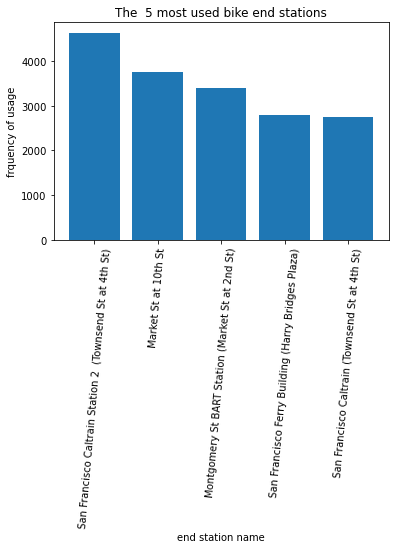

In [23]:
top_5 = Ford_data.end_station_name.value_counts()[:5]
plt.bar(x = top_5.index, height = top_5.values)
plt.xticks(rotation = 85);
plot_func(plt, 'end station name','frquency of usage','The  5 most used bike end stations')

San Francisco Caltrain Station 2 (Townsend St at 4th St),Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),
San Francisco Ferry Building (Harry Bridges Plaza),Powell St BART Station (Market St at 4th St) are the 5 busiest end journey stations fro the cyclers. If you noticed too, the first,second and fourth start stations are the top three end station, thus one can assume a concentration of cyclers in these specific regions

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Age column as derived from the member_birth_year column had outliers in it, I was drawn to the 141 years of age that was seen in the data, this prompted me to check against outliers, also the duration_mins column had outliers. These columns came up with a total of 18099 outliers which I then made away with as to ensure effective analysis. This can be seen as so large data to be removed from an analysis, but from the dataset at hand, this constitutes abouts 9% of the total data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Because of how large the duration sec would make the data seem so large,so I brought it down to minutes. From the visualization, the minutes are right skewed and unimodal in structure. It also shows that most cyclers use the bike for less than ten minutes. The more the amount of time spent, the lesser the cyclers

## Bivariate Exploration

### Is there any relationship between time spent cycling and gender?

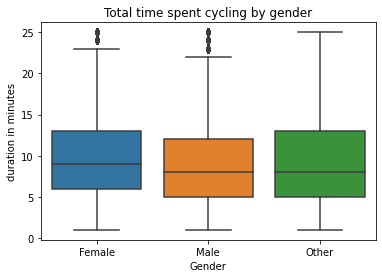

In [24]:
sb.boxplot(data = Ford_data, x = 'member_gender', y = 'duration_mins');
plot_func(plt, 'Gender','duration in minutes','Total time spent cycling by gender')

Surprisingly female spend more time cycling on the average than male

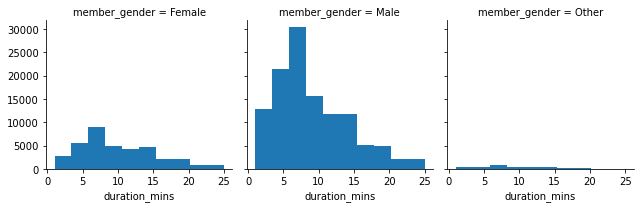

In [25]:
# In support of the boxplot above, I facetted the variables. The height only goes to show the 
#number of cyclers not duration spent 
g = sb.FacetGrid(data = Ford_data, col = 'member_gender')
g.map(plt.hist, 'duration_mins');

### Is there any relationship between time spent cycling and age?

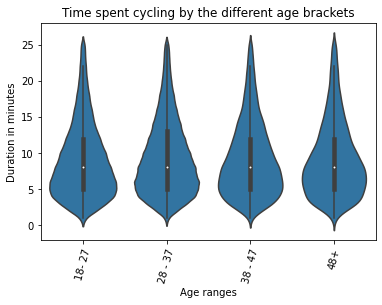

In [26]:
# To avoid having a multitude of ages lined up and for clarity, I decided to range the ages 
bins = np.arange(18,54 + 10, 10)
labels = ['18- 27', '28 - 37', '38 - 47','48+']
Ford_data['age_range'] = pd.cut(Ford_data.age, bins, labels = labels, include_lowest = True)

color = sb.color_palette()[0]
sb.violinplot(data = Ford_data, x = 'age_range', y = 'duration_mins', color = color);
plt.xticks(rotation = 75);
plot_func(plt, 'Age ranges', 'Duration in minutes', 'Time spent cycling by the different age brackets')

In [27]:
# The violinplot above seems to have the same quartile values and upper and lower whiskers for the second to the fourth age range,I checked to find a small difference between them all 
Ford_data.groupby('age_range')['duration_mins'].mean()

age_range
18- 27     9.003747
28 - 37    9.428170
38 - 47    9.223614
48+        9.229280
Name: duration_mins, dtype: float64

The means are almost the same too but that of the 28 - 37 age range recorded the highest and has the longest whisker in the violinplot above.
From the chart above, we find out that age_range also has no significant effect on the duration spent cycling.

The time period cyclers cycle the most for is within 5 - 10 minutes for all gender, lesser persons spend more time cycling, debunking my initial assumption of the male gender spending more time cycling as they are considered to be the stronger gender

### Is there any relationship between time spent cycling and user_type?

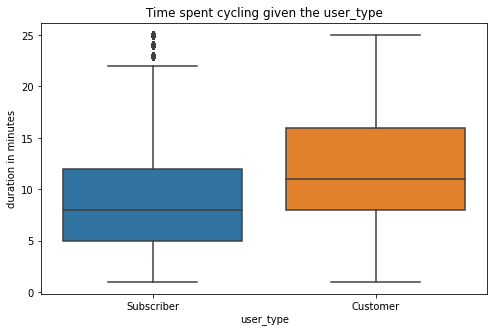

In [28]:
plt.figure(figsize = [8,5])
sb.boxplot(data = Ford_data,x = 'user_type', y = 'duration_mins');
plot_func(plt,'user_type','duration in minutes','Time spent cycling given the user_type')

Customers spend more time cycling than subscribers

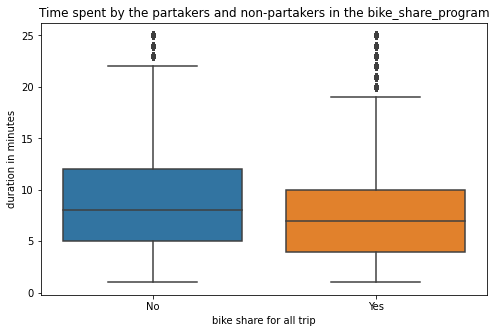

In [29]:
plt.figure(figsize = [8,5])
sb.boxplot(data = Ford_data,x = 'bike_share_for_all_trip', y = 'duration_mins');
plot_func(plt,'bike share for all trip','duration in minutes','Time spent by the partakers and non-partakers in the bike_share_program')

Those who are not in the bike_share_for_all_trip program spend more time cycling  further research showed that the program was made for the low level income earners and cycling is charged by the minutes spent for all both subscribers and customers, it is safe to assume that those not in the program are buoyant enough and do not excatly mind how much they pay for their journies

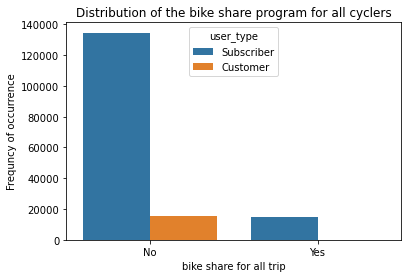

In [30]:
sb.countplot(data = Ford_data, hue = 'user_type', x = 'bike_share_for_all_trip');
plot_func(plt,'bike share for all trip','Frequncy of occurrence','Distribution of the bike share program for all cyclers')

This makes alot of sense, from the chart above no customer is involved in the bike_share_for_all_trip program, the bike hire company also have more subscribers than customer, a lot of cyclers could have decided to subscribe as to save more money

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My initial thought of having more male cycling for a larger amount of time was debunked from the analysis above. Yes, I was right about having more male but they do not spend more time than other members cycling thus gender has no significant effect on the amount of time spent cycling

> Same goes for ages, while we have more cyclers within the vibrant ages of 28 - 37 in the dataset, there exists no significant effect of ages on time spent cycling.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers spend more time cycling than subscribers, initially I thought reverse would be the case, as the bike hire is a pay as you go program

## Multivariate Exploration

Here I would analyse to further affirm what I have previously stated from the univariate and the bivariate analysis carried out above

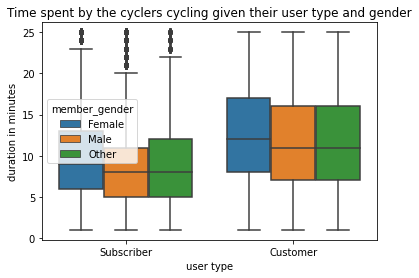

In [31]:
sb.boxplot(data = Ford_data,x = 'user_type', y = 'duration_mins',hue = 'member_gender');
plot_func(plt,'user type','duration in minutes','Time spent by the cyclers cycling given their user type and gender')

This further supports the claim that more customers spend more time cycling than subscribers not minding the gender

### Lets look at the time spent cycling by the different gender given their age ranges

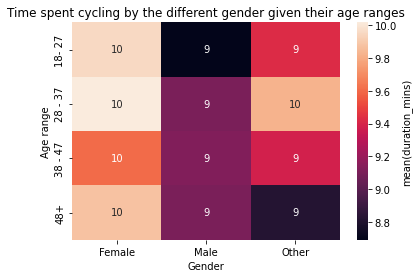

In [32]:
duration_means = Ford_data.groupby(['age_range', 'member_gender']).mean()['duration_mins']
duration_means = duration_means.reset_index(name = 'duration_mins_avg')
duration_means = duration_means.pivot(index = 'age_range', columns = 'member_gender',
                            values = 'duration_mins_avg')
sb.heatmap(duration_means, annot = True,  fmt = '.0f',
           cbar_kws = {'label' : 'mean(duration_mins)'});
plot_func(plt, 'Gender', 'Age range','Time spent cycling by the different gender given their age ranges');

Female for all ages have an average cycle time of 10 while Male have 9,this supports the claim that there is no significant diference in the time spent cycling given the ages of the cyclers and the on the average female spend more time cycling irrespective of age

### Lets examine the possibility of a relationship among user type, bike share for all trip and duration mins columns

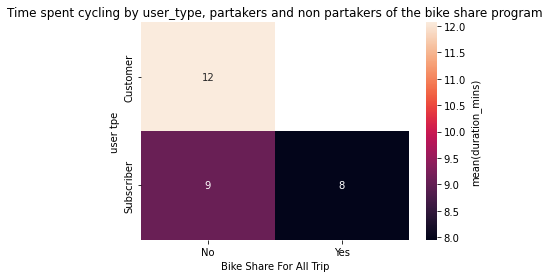

In [33]:
duration_means = Ford_data.groupby(['user_type', 'bike_share_for_all_trip']).mean()['duration_mins']
duration_means = duration_means.reset_index(name = 'duration_mins_avg')
duration_means = duration_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'duration_mins_avg')
sb.heatmap(duration_means, annot = True,  fmt = '.0f',
           cbar_kws = {'label' : 'mean(duration_mins)'});
plot_func(plt, 'Bike Share For All Trip','user tpe','Time spent cycling by user_type, partakers and non partakers of the bike share program');

No customer partook in the program, and on the average, customers spend 12 mins cycling while subscribers who didnt partake in the program spend 9mins on the avearge cycling.
Subscribers who partook in the program spent the least time cycling, the reason for this is not accounted for in our dataset.

The company here supports only subscibers to be in the bike_share_for_all_trip program.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The charts here served to further support the claims in the bivariate analysis, while on the average, female spend more time cycling than men, gender has no significant impact on the duration spent cycling

> Despite having alot more subscribers than customers with no customer partaking in the bike_share_for_all_trip program, customers still spend more time cycling than the subscribers, a greater part of the subcribers are also not in the bike_share_for_all_trip program.

### Were there any interesting or surprising interactions between features?

> Despite not amounting to much in our variables of interest, the fact of female gender spending more time on the average than men was quite surprising

## Conclusions

>The dataset used above looked at cyclers in their different ages and their involvement with a companies bike_share program. The initial assumption I had prior to starting this analysis was that their would be more male than female using this means of transportation and that the male would spend more time riding than female, I was also of the mindset that the subscribers would ride for a longer time than customers since it is pay as you go(ie the amount of time spent determines how much you pay).


> From the analysis, as I had expected, there were more male than female in the dataset but this did not affect the amount of time spent cycling as I had expected male to ride for a longer amount of time given the streneous nature of bike riding, the analysis showed the female to ride on the average a little longer than the male which was surprising.

> Despite having more of the young and vibrant agewise making use of this transport system, age does not affect the amount of time spent cycling for all the age_range in the dataset. Most of the cyclers spend 5 - 10 minutes cycling.

> Analysis further revealed that the bike_for_share program was strictly for subscribers but was still optional among the them(the subscribers). The number of subscribers who partook in the bike_share_for_all_trip was alittle lesser than 20% of the total subscribers, this means that the program is not so popular among cyclers. Time duration spent cycling on the average is the least among  subscribers that partook in the program, this coukd have been caused by alot of factors like poor orientation of these cyclers.

> Summarily neither gender nor age was a major determinant of the time spend cycling. The bike share for all trip program was strictly for subscribers. The number of cyclers subscribers who partook in the program was quite poor.

